In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
sales = pd.read_csv('sales_uplift.csv')

In [77]:
sales.head()
sales['date'] = pd.to_datetime(sales['date'])

In [78]:
sales.head()

,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign,campaign_period
0,2021-01-01,372,58,4,42.01,168.04,False,Pre-Campaign
1,2021-01-02,288,61,1,74.71,74.71,False,Pre-Campaign
2,2021-01-03,130,24,3,36.74,110.22,False,Pre-Campaign
3,2021-01-04,175,20,3,60.98,182.94,False,Pre-Campaign
4,2021-01-05,462,37,2,52.84,105.68,False,Pre-Campaign


In [79]:
missing_value = sales.isnull().sum()
print(missing_value)

date                  0
customer_id           0
product_id            0
quantity              0
unit_price            0
revenue               0
marketing_campaign    0
campaign_period       0
dtype: int64


In [80]:
duplicates = sales.duplicated().sum()
print(duplicates)

0


In [81]:
product = sales.groupby('product_id')['revenue'].mean()
print(product)

product_id
1      334.840000
2      295.410000
3      650.740000
4      158.595000
5      224.195000
          ...    
96     280.386667
97      92.560000
98     293.122000
99     473.365000
100     66.350000
Name: revenue, Length: 94, dtype: float64


In [82]:
tot_revenue = sales['revenue'].sum()
print(tot_revenue)

70089.53


In [83]:
tot_quantity = sales['quantity'].sum()
print(tot_quantity)

1215


In [84]:
quanity_per_product = sales.groupby('product_id')['quantity'].sum().reset_index()
quanity_per_product.rename(columns= {'quantity':'total_quantity'}, inplace= True)
print(quanity_per_product)

    product_id  total_quantity
0            1              28
1            2              14
2            3              17
3            4               8
4            5              19
..         ...             ...
89          96              22
90          97               1
91          98              22
92          99              19
93         100               3

[94 rows x 2 columns]


In [85]:
sales.groupby('marketing_campaign')['revenue'].sum()

marketing_campaign
False    32692.24
True     37397.29
Name: revenue, dtype: float64

In [86]:
campaign_true = sales[sales['marketing_campaign'] == True]
campaign_false = sales[sales['marketing_campaign'] == False]

print("Data where marketing campaign is True:")
print(campaign_true.head())

print("\nData where marketing campaign is False:")
print(campaign_false.head())

Data where marketing campaign is True:
          date  customer_id  product_id  quantity  unit_price  revenue  \
200 2021-07-20          459          82        12       83.62  1003.44   
201 2021-07-21          466          13        15       84.89  1273.35   
202 2021-07-22           12          23        13       55.67   723.71   
203 2021-07-23           87          83        13       10.57   137.41   
204 2021-07-24           12          75        13       35.83   465.79   

     marketing_campaign  campaign_period  
200                True  During Campaign  
201                True  During Campaign  
202                True  During Campaign  
203                True  During Campaign  
204                True  During Campaign  

Data where marketing campaign is False:
        date  customer_id  product_id  quantity  unit_price  revenue  \
0 2021-01-01          372          58         4       42.01   168.04   
1 2021-01-02          288          61         1       74.71    74.71   
2

In [87]:
campaign_revenue = sales[sales['marketing_campaign'] == True]['revenue'].sum().round(2)
print(f"Revenue during marketing campaign: {campaign_revenue}")
no_campaign_revenue = sales[sales['marketing_campaign'] == False]['revenue'].sum().round(2)
print(f"Revenue during no marketing campaign: {no_campaign_revenue}")
revenue_change = campaign_revenue - no_campaign_revenue
print(f"Change in revenue during marketing campaign: {revenue_change.round(2)}")

Revenue during marketing campaign: 37397.29
Revenue during no marketing campaign: 32692.24
Change in revenue during marketing campaign: 4705.05


In [88]:
campagin_days = sales[sales['marketing_campaign'] == True].count()
no_campagin_days = sales[sales['marketing_campaign'] == False].count()

print(campagin_days)
print(no_campagin_days)

date                  50
customer_id           50
product_id            50
quantity              50
unit_price            50
revenue               50
marketing_campaign    50
campaign_period       50
dtype: int64
date                  200
customer_id           200
product_id            200
quantity              200
unit_price            200
revenue               200
marketing_campaign    200
campaign_period       200
dtype: int64


In [89]:
campaign_revenue_avg = sales[sales['marketing_campaign'] == True]['revenue'].mean().round(2)
no_campaign_revenue_avg = sales[sales['marketing_campaign'] == False]['revenue'].mean().round(2)
print(f'The average revenue for campaign days is: {campaign_revenue_avg}')
print(f'The average revenue for no campaign days is: {no_campaign_revenue_avg}')

The average revenue for campaign days is: 747.95
The average revenue for no campaign days is: 163.46


In [90]:
# The difference between both values
multi = (campaign_revenue_avg / no_campaign_revenue_avg).round(2)
print(f'The multiplier between values: {multi}')

The multiplier between values: 4.58


In [91]:
# Also lets see the change in quanity between these
campaign_quantity_avg = sales[sales['marketing_campaign'] == True]['quantity'].mean().round(2)
no_campaign_quantity_avg = sales[sales['marketing_campaign'] == False]['quantity'].mean().round(2)
print(f'The average quantity when campagin is true: {campaign_quantity_avg}')
print(f'The average quantity when campagin is false: {no_campaign_quantity_avg}')


The average quantity when campagin is true: 12.82
The average quantity when campagin is false: 2.87


In [92]:
pre_period = [
    sales[sales['marketing_campaign'] == False]['date'].min(),
    sales[sales['marketing_campaign'] == False]['date'].max()
]
post_period = [
    sales[sales['marketing_campaign'] == True]['date'].min(),
    sales[sales['marketing_campaign'] == True]['date'].max()
]


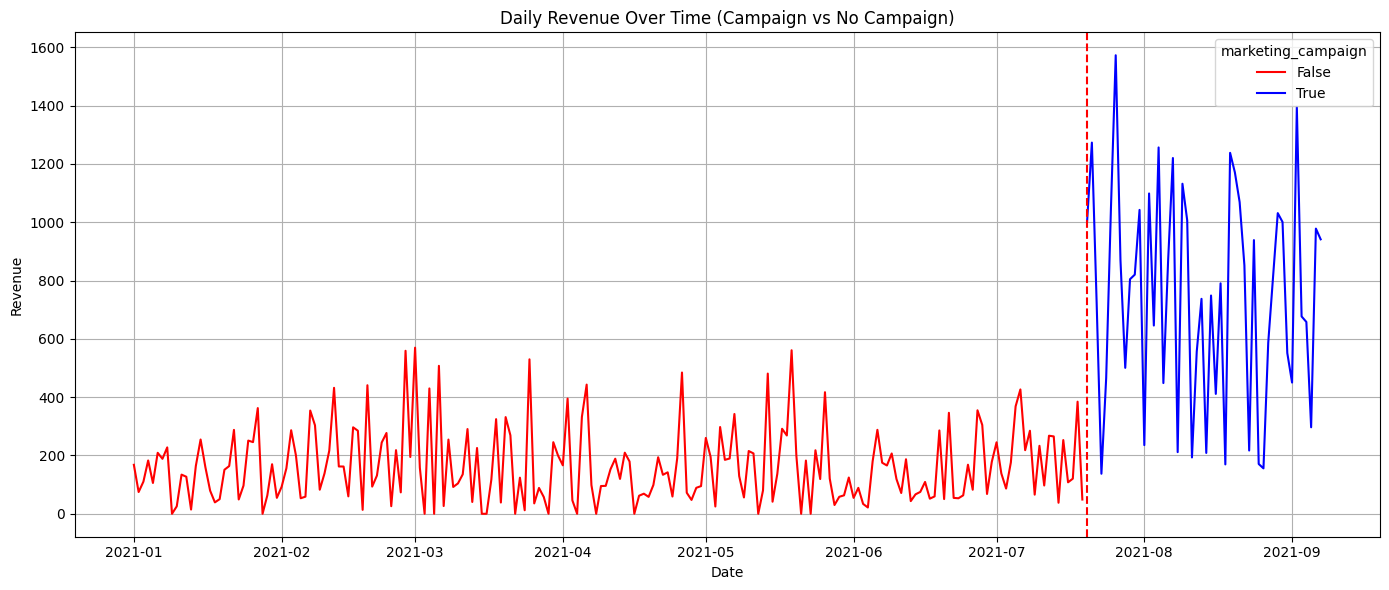

In [93]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales, x='date', y='revenue', hue='marketing_campaign', palette={False: "red", True: "blue"})
plt.axvline(sales[sales['marketing_campaign']].date.min(), color='red', linestyle='--', label='Campaign Start')
plt.title('Daily Revenue Over Time (Campaign vs No Campaign)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

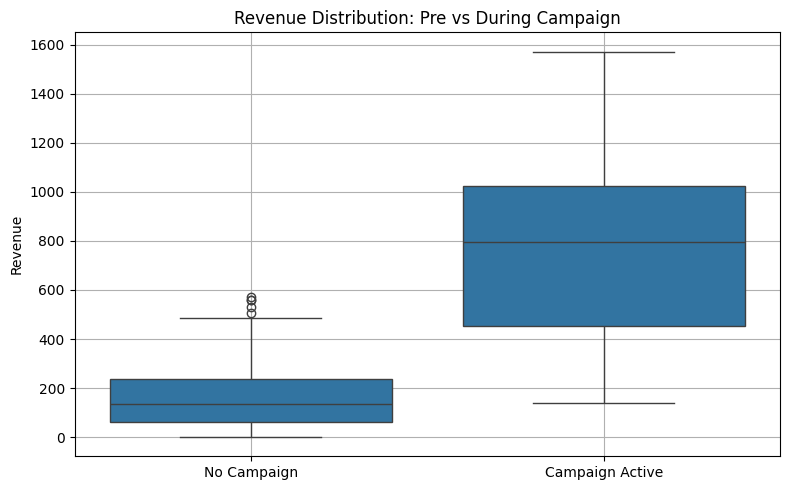

In [94]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales, x='marketing_campaign', y='revenue')
plt.xticks([0, 1], ['No Campaign', 'Campaign Active'])
plt.title('Revenue Distribution: Pre vs During Campaign')
plt.xlabel('')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

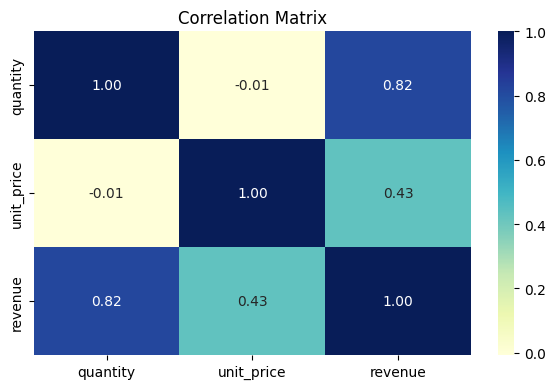

In [95]:
corr = sales[['quantity', 'unit_price', 'revenue']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

/var/folders/wk/btl5__ws27j89zzfj9xyfnf80000gp/T/ipykernel_16963/3033677458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')


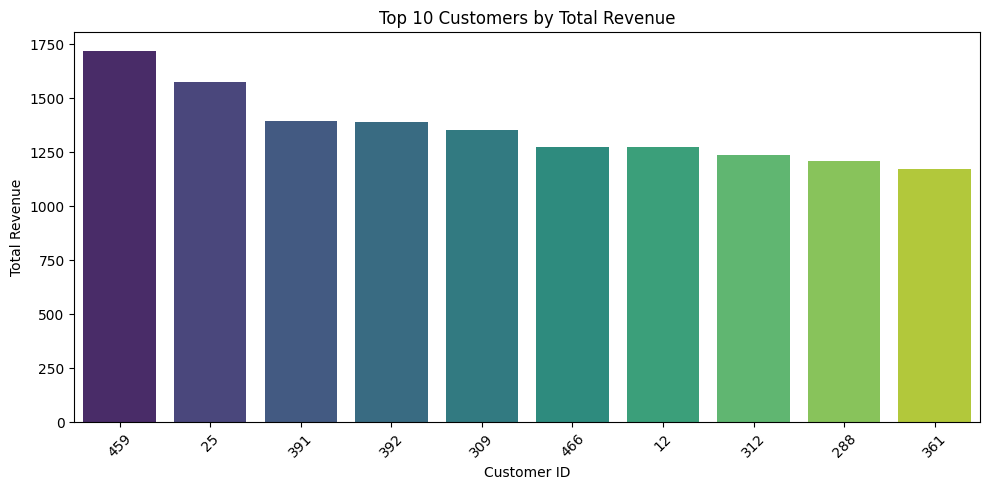

In [96]:
top_customers = sales.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


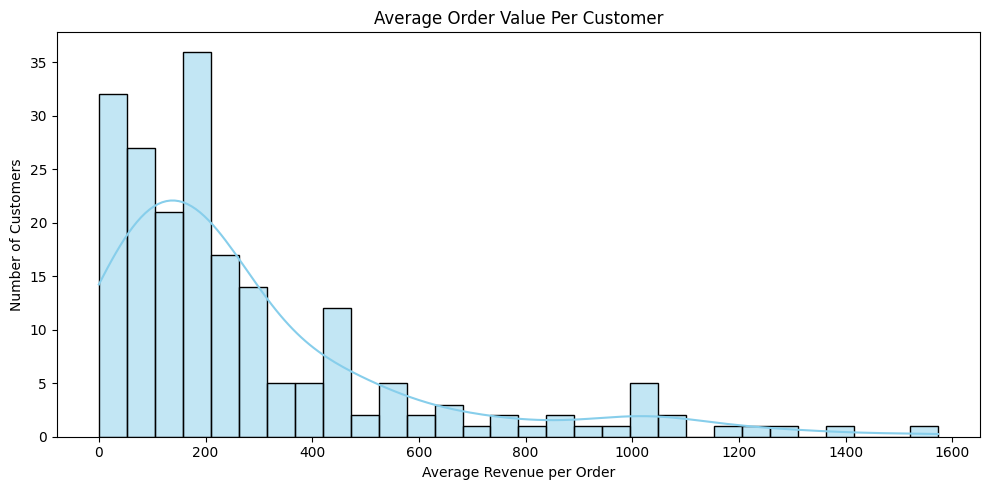

In [97]:
aov = sales.groupby('customer_id')['revenue'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(aov, bins=30, kde=True, color='skyblue')
plt.title('Average Order Value Per Customer')
plt.xlabel('Average Revenue per Order')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

/var/folders/wk/btl5__ws27j89zzfj9xyfnf80000gp/T/ipykernel_16963/630196658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_revenue, x='campaign_period', y='revenue', palette='Set2')


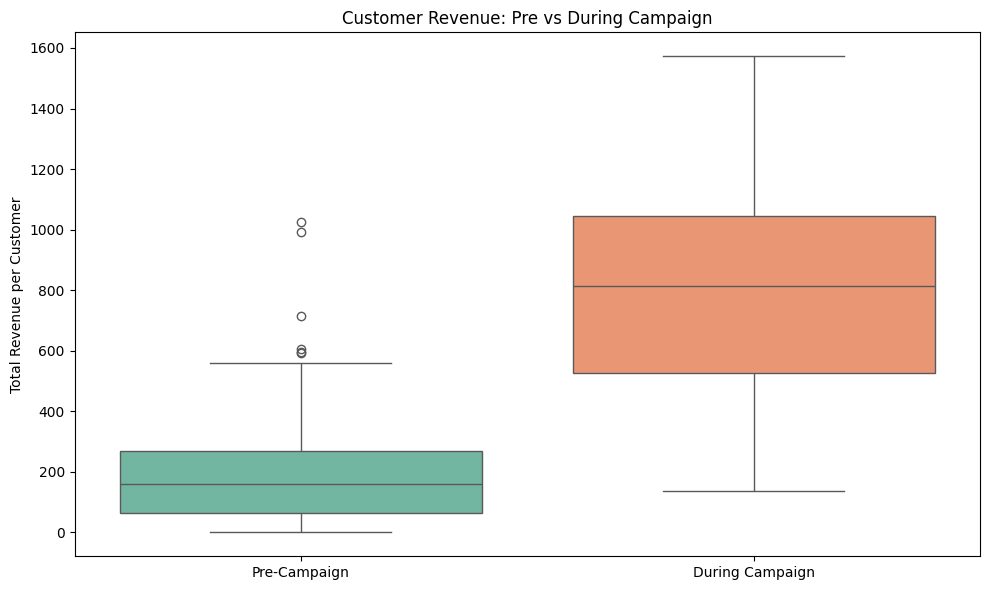

In [98]:
# Tag period labels
sales['campaign_period'] = sales['marketing_campaign'].map({False: 'Pre-Campaign', True: 'During Campaign'})

customer_revenue = sales.groupby(['customer_id', 'campaign_period'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_revenue, x='campaign_period', y='revenue', palette='Set2')
plt.title('Customer Revenue: Pre vs During Campaign')
plt.ylabel('Total Revenue per Customer')
plt.xlabel('')
plt.tight_layout()
plt.show()

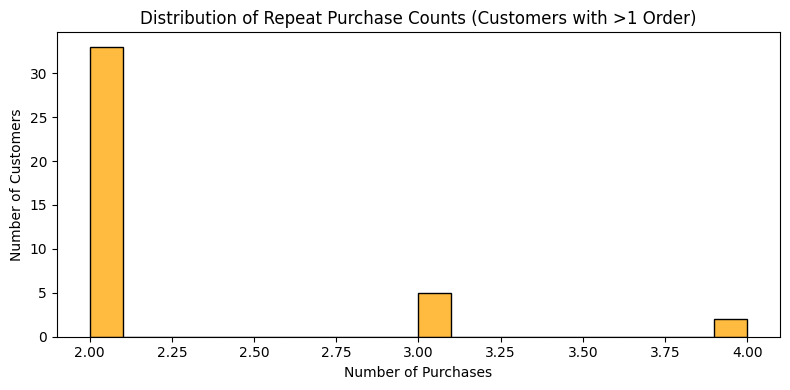

In [99]:
# Count number of purchases per customer
purchase_counts = sales.groupby('customer_id').size()

# Customers who purchased more than once
repeat_customers = purchase_counts[purchase_counts > 1]

plt.figure(figsize=(8, 4))
sns.histplot(repeat_customers, bins=20, color='orange')
plt.title('Distribution of Repeat Purchase Counts (Customers with >1 Order)')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

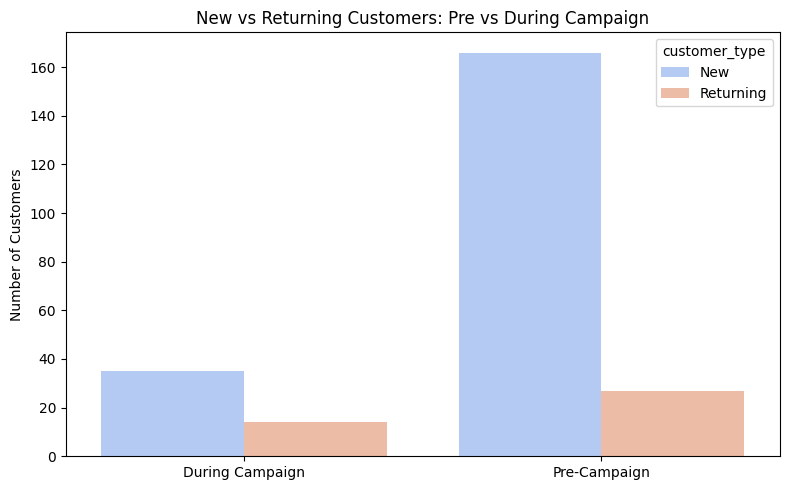

In [100]:
# First purchase date per customer
first_purchase = sales.groupby('customer_id')['date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

# Merge with original data
sales_with_first = pd.merge(sales, first_purchase, on='customer_id')

# Tag new vs returning
sales_with_first['customer_type'] = sales_with_first.apply(
    lambda x: 'New' if x['date'] == x['first_purchase_date'] else 'Returning', axis=1)

# Group by period and type
customer_types = sales_with_first.groupby(['campaign_period', 'customer_type'])['customer_id'].nunique().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=customer_types, x='campaign_period', y='customer_id', hue='customer_type', palette='coolwarm')
plt.title('New vs Returning Customers: Pre vs During Campaign')
plt.ylabel('Number of Customers')
plt.xlabel('')
plt.tight_layout()
plt.show()

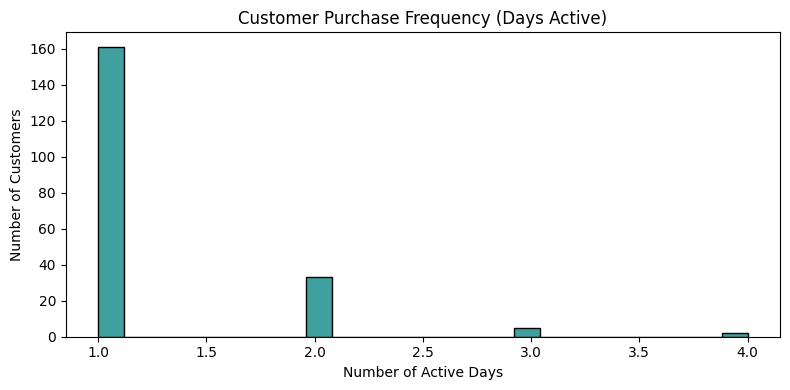

In [101]:
purchase_frequency = sales.groupby('customer_id')['date'].nunique()

plt.figure(figsize=(8, 4))
sns.histplot(purchase_frequency, bins=25, color='teal')
plt.title('Customer Purchase Frequency (Days Active)')
plt.xlabel('Number of Active Days')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [102]:
daily_ts = sales.groupby('date')['revenue'].sum()
print(daily_ts)

date
2021-01-01    168.04
2021-01-02     74.71
2021-01-03    110.22
2021-01-04    182.94
2021-01-05    105.68
               ...  
2021-09-03    677.04
2021-09-04    658.06
2021-09-05    296.76
2021-09-06    978.36
2021-09-07    941.59
Name: revenue, Length: 250, dtype: float64


In [103]:
sales.head(-1)

,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign,campaign_period
0,2021-01-01,372,58,4,42.01,168.04,False,Pre-Campaign
1,2021-01-02,288,61,1,74.71,74.71,False,Pre-Campaign
2,2021-01-03,130,24,3,36.74,110.22,False,Pre-Campaign
3,2021-01-04,175,20,3,60.98,182.94,False,Pre-Campaign
4,2021-01-05,462,37,2,52.84,105.68,False,Pre-Campaign
...,...,...,...,...,...,...,...,...
244,2021-09-02,391,26,14,99.74,1396.36,True,During Campaign
245,2021-09-03,332,25,14,48.36,677.04,True,During Campaign
246,2021-09-04,305,12,13,50.62,658.06,True,During Campaign
247,2021-09-05,350,5,12,24.73,296.76,True,During Campaign


In [104]:
print(sales['date'].min())
print(sales['date'].max())
print(sales['date'].nunique())

2021-01-01 00:00:00
2021-09-07 00:00:00
250


In [107]:
from prophet import Prophet
import matplotlib.pyplot as plt

prophet_data = sales.groupby('date')['revenue'].sum().reset_index()
prophet_data.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

In [108]:
# Define pre- and post- periods
pre_period = [
    sales[sales['marketing_campaign'] == False]['date'].min(),
    sales[sales['marketing_campaign'] == False]['date'].max()
]

post_period = [
    sales[sales['marketing_campaign'] == True]['date'].min(),
    sales[sales['marketing_campaign'] == True]['date'].max()
]

In [109]:
from prophet import Prophet

pre_data = prophet_data[(prophet_data['ds'] >= pre_period[0]) & (prophet_data['ds'] <= pre_period[1])]

model = Prophet()
model.fit(pre_data)

future = model.make_future_dataframe(periods=len(prophet_data[prophet_data['ds'] >= post_period[0]]), freq='D')
forecast = model.predict(future)

12:24:41 - cmdstanpy - INFO - Chain [1] start processing
12:24:41 - cmdstanpy - INFO - Chain [1] done processing


In [110]:
# Extract post-campaign forecast
forecast_post = forecast[(forecast['ds'] >= post_period[0]) & (forecast['ds'] <= post_period[1])].copy()

# Actual revenue post-campaign
post_actual = prophet_data[(prophet_data['ds'] >= post_period[0]) & (prophet_data['ds'] <= post_period[1])].copy()

# ✅ At this point, both forecast_post['ds'] and post_actual['ds'] are datetime64
# (No need for extra pd.to_datetime again)

# Merge actual vs predicted
comparison = post_actual.merge(forecast_post[['ds', 'yhat']], on='ds')

# Calculate uplift
comparison['uplift'] = comparison['y'] - comparison['yhat']
comparison['uplift_percent'] = 100 * comparison['uplift'] / comparison['yhat']

# Summary
total_actual_revenue = comparison['y'].sum()
total_predicted_revenue = comparison['yhat'].sum()
total_uplift = total_actual_revenue - total_predicted_revenue
uplift_percent = (total_uplift / total_predicted_revenue) * 100

print(f"📈 Total Actual Revenue (Post Campaign): ${total_actual_revenue:.2f}")
print(f"📉 Total Predicted Revenue (No Campaign): ${total_predicted_revenue:.2f}")
print(f"🔼 Estimated Uplift: ${total_uplift:.2f}")
print(f"🔼 Uplift Percentage: {uplift_percent:.2f}%")


📈 Total Actual Revenue (Post Campaign): $37397.29
📉 Total Predicted Revenue (No Campaign): $8033.13
🔼 Estimated Uplift: $29364.16
🔼 Uplift Percentage: 365.54%


/var/folders/wk/btl5__ws27j89zzfj9xyfnf80000gp/T/ipykernel_16963/1837243811.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/alkyam.23/Desktop/visual studio code/my_environment/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


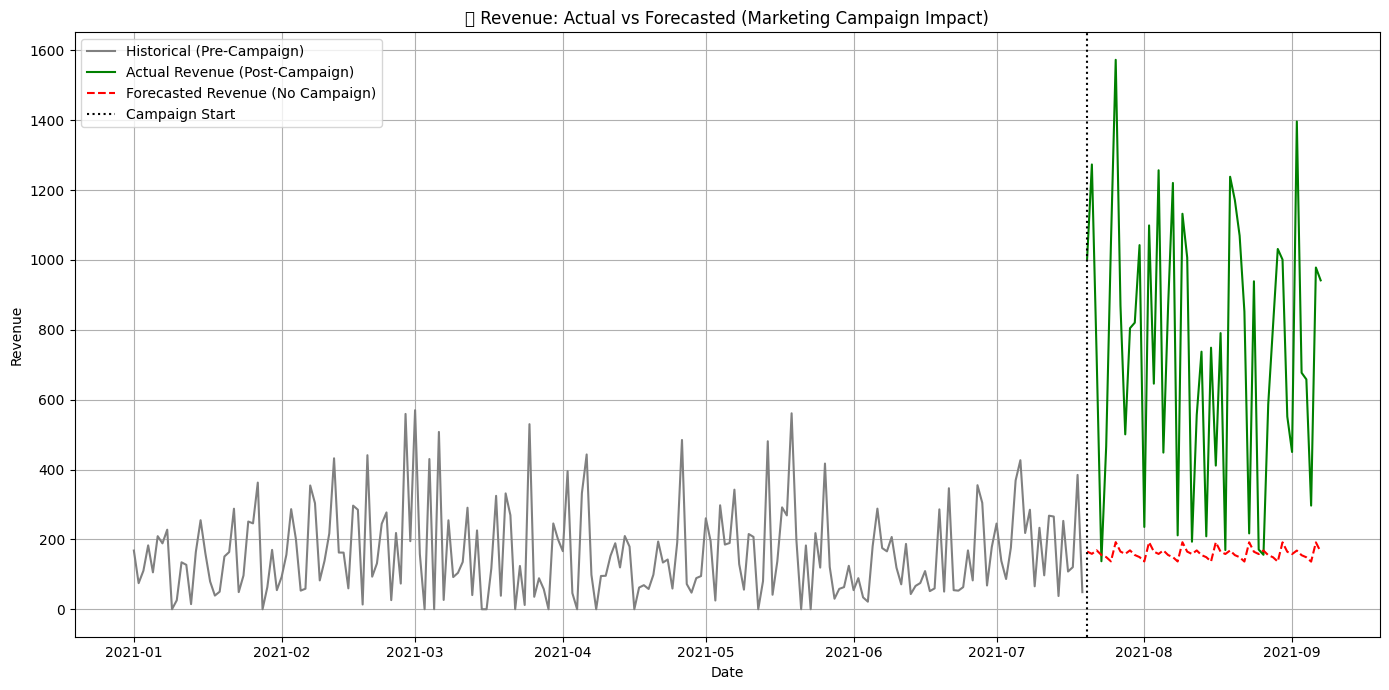

In [111]:

# Plot actual vs predicted revenue
plt.figure(figsize=(14, 7))

# Historical pre-campaign
plt.plot(pre_data['ds'], pre_data['y'], label='Historical (Pre-Campaign)', color='gray')

# Actual revenue post-campaign
plt.plot(post_actual['ds'], post_actual['y'], label='Actual Revenue (Post-Campaign)', color='green')

# Forecasted revenue post-campaign (what would have happened without campaign)
plt.plot(forecast_post['ds'], forecast_post['yhat'], label='Forecasted Revenue (No Campaign)', color='red', linestyle='--')

# Campaign start line
plt.axvline(post_period[0], color='black', linestyle=':', label='Campaign Start')

plt.title('📈 Revenue: Actual vs Forecasted (Marketing Campaign Impact)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
